<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sieć-CNN-na-danych-MNIST" data-toc-modified-id="Sieć-CNN-na-danych-MNIST-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sieć CNN na danych MNIST</a></span></li><li><span><a href="#Dane-MNIST" data-toc-modified-id="Dane-MNIST-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dane MNIST</a></span></li><li><span><a href="#Przygotowanie-danych" data-toc-modified-id="Przygotowanie-danych-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Przygotowanie danych</a></span></li><li><span><a href="#Format-channels_last" data-toc-modified-id="Format-channels_last-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Format channels_last</a></span></li><li><span><a href="#Centrowanie-danych-i-kodowanie-etykiet-klas-one-hot" data-toc-modified-id="Centrowanie-danych-i-kodowanie-etykiet-klas-one-hot-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Centrowanie danych i kodowanie etykiet klas one-hot</a></span></li><li><span><a href="#Budowanie-modelu-CNN" data-toc-modified-id="Budowanie-modelu-CNN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Budowanie modelu CNN</a></span></li><li><span><a href="#Konfigurowanie-i-trening-modelu" data-toc-modified-id="Konfigurowanie-i-trening-modelu-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Konfigurowanie i trening modelu</a></span></li><li><span><a href="#Poprawność-klasyfikacji-na-zbiorze-testowym" data-toc-modified-id="Poprawność-klasyfikacji-na-zbiorze-testowym-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Poprawność klasyfikacji na zbiorze testowym</a></span></li><li><span><a href="#Predykcja" data-toc-modified-id="Predykcja-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Predykcja</a></span></li><li><span><a href="#Predykcja---prawdopodobieństwo-wyjść" data-toc-modified-id="Predykcja---prawdopodobieństwo-wyjść-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Predykcja - prawdopodobieństwo wyjść</a></span></li><li><span><a href="#Macierz-pomyłek" data-toc-modified-id="Macierz-pomyłek-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Macierz pomyłek</a></span><ul class="toc-item"><li><span><a href="#Ćwiczenie" data-toc-modified-id="Ćwiczenie-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Ćwiczenie</a></span></li></ul></li><li><span><a href="#Informacje-o-warstwach-modelu" data-toc-modified-id="Informacje-o-warstwach-modelu-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Informacje o warstwach modelu</a></span></li><li><span><a href="#Wizualizacja-wag-(filtrów)-pierwszej-warstwy-splotowej" data-toc-modified-id="Wizualizacja-wag-(filtrów)-pierwszej-warstwy-splotowej-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Wizualizacja wag (filtrów) pierwszej warstwy splotowej</a></span></li><li><span><a href="#Wizualizacja-map-cech" data-toc-modified-id="Wizualizacja-map-cech-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Wizualizacja map cech</a></span></li><li><span><a href="#Odczytywanie-aktywacji-warstwy-splotowej" data-toc-modified-id="Odczytywanie-aktywacji-warstwy-splotowej-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Odczytywanie aktywacji warstwy splotowej</a></span></li><li><span><a href="#Aktywacja-warstwy-max-pool" data-toc-modified-id="Aktywacja-warstwy-max-pool-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Aktywacja warstwy max pool</a></span><ul class="toc-item"><li><span><a href="#Ćwiczenie" data-toc-modified-id="Ćwiczenie-16.1"><span class="toc-item-num">16.1&nbsp;&nbsp;</span>Ćwiczenie</a></span></li></ul></li><li><span><a href="#Zadanie---LeNet5-na-MNIST" data-toc-modified-id="Zadanie---LeNet5-na-MNIST-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Zadanie - LeNet5 na MNIST</a></span></li></ul></div>

## Sieć CNN na danych MNIST

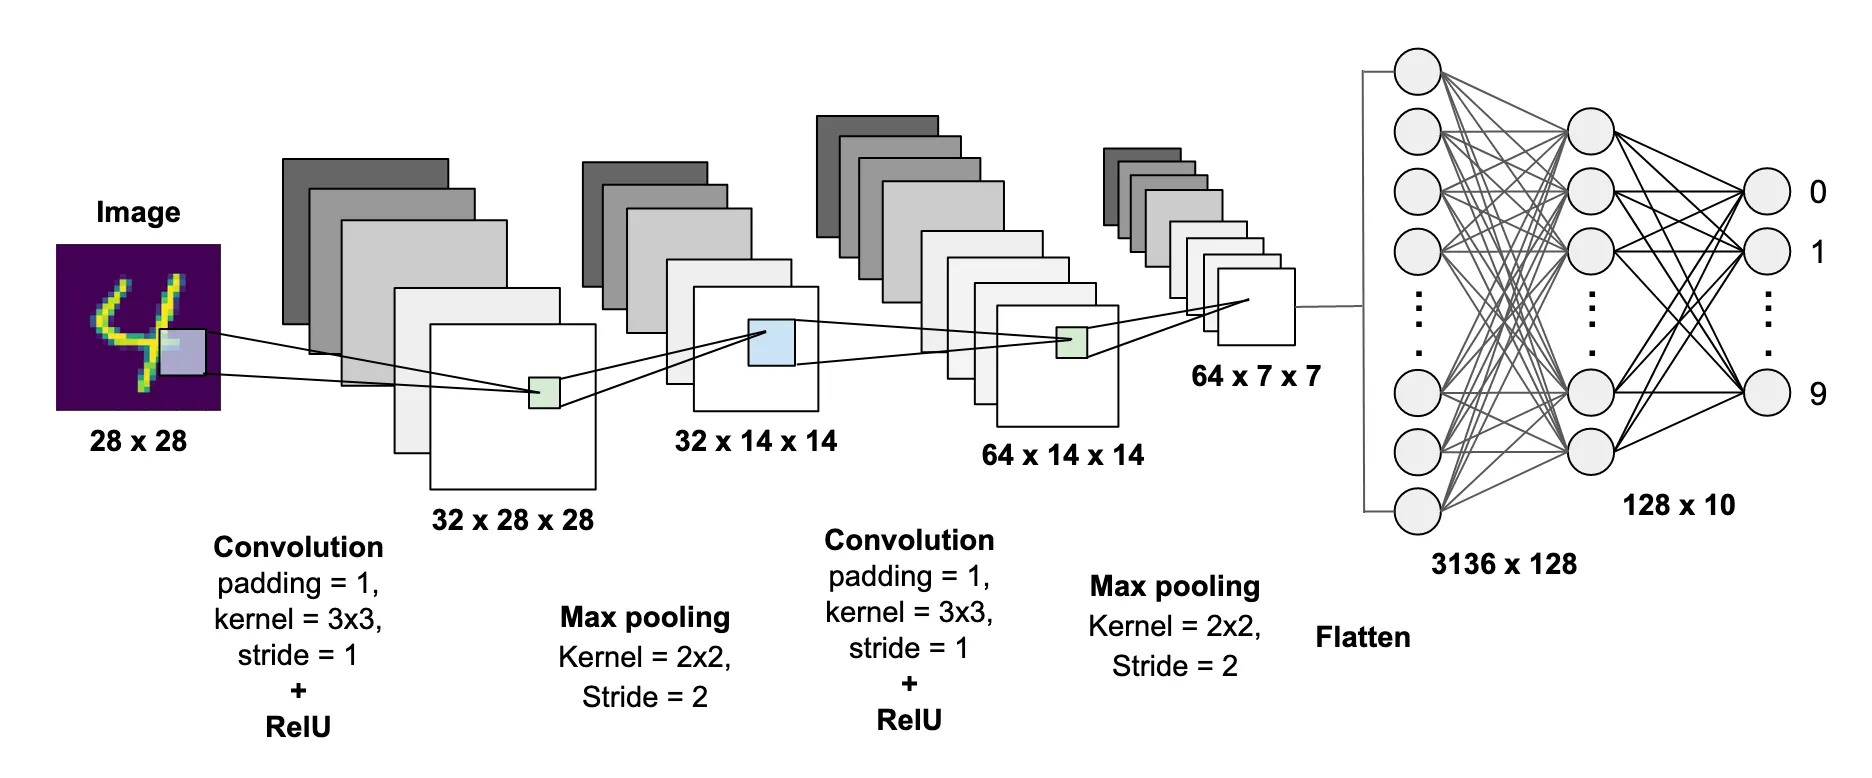



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__)

## Dane MNIST

In [ ]:
(img_train, labels_train), (img_test, labels_test) = tf.keras.datasets.mnist.load_data()
print("Dane uczące:", img_train.shape, labels_train.shape)
print("Dane testowe:", img_test.shape, labels_test.shape)

plt.imshow(img_train[0], cmap="gray")
plt.colorbar();

## Przygotowanie danych

Obrazy mogą być przetwarzane w formacie ``'channels_first'`` (RGB, wysokość, szerokość) lub ``'channels_last'`` (wysokość, szerokość, RGB).  

Sprawdźmy aktualne ustawienia Keras


In [ ]:
tf.keras.backend.image_data_format()

## Format channels_last

Format ``'channels_last'`` oznacza, że obrazy będą tensorami o wymiarach ``[wysokość, szerokość, liczba kanałów]``.

Zbiór danych uczących X będzie więc tensorem ``[ilość przypadków, wysokość, szerokość, liczba kanałów]``. 


In [ ]:
x_train = img_train.reshape(img_train.shape[0], 28, 28, 1).astype('float32') / 255.
x_test = img_test.reshape(img_test.shape[0], 28, 28, 1).astype('float32') / 255.

print(x_train.shape)

## Centrowanie danych i kodowanie etykiet klas one-hot



In [ ]:
x_mean = np.mean(x_train, axis=0)
x_train = x_train - x_mean
x_test = x_test - x_mean

plt.imshow(x_train[0], cmap="gray", vmin=-0.5, vmax=0.5)
plt.colorbar();

y_train = tf.keras.utils.to_categorical(labels_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(labels_test, num_classes=10)

print(y_train[0])

## Budowanie modelu CNN


Podstawowe elementy sieci CNN:
* model sekwencyjny
* warstwa wejściowa obsługuje sygnał o wymiarach ``(28, 28, 1)``
* warstwa splotowa [tf.keras.layers.Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/), parametry ``filters`` i ``kernel_size``
* warstwa max pooling [tf.keras.layers.MaxPooling2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/), parametry ``filters`` i ``kernel_size`` 
* warstwa wypłaszczająca [tf.keras.layers.Flatten](https://keras.io/api/layers/reshaping_layers/flatten/)
* warstwy o pełnych połaczeniach i warstwa wyjściowa [tf.keras.layers.Dense](https://keras.io/api/layers/core_layers/dense/)

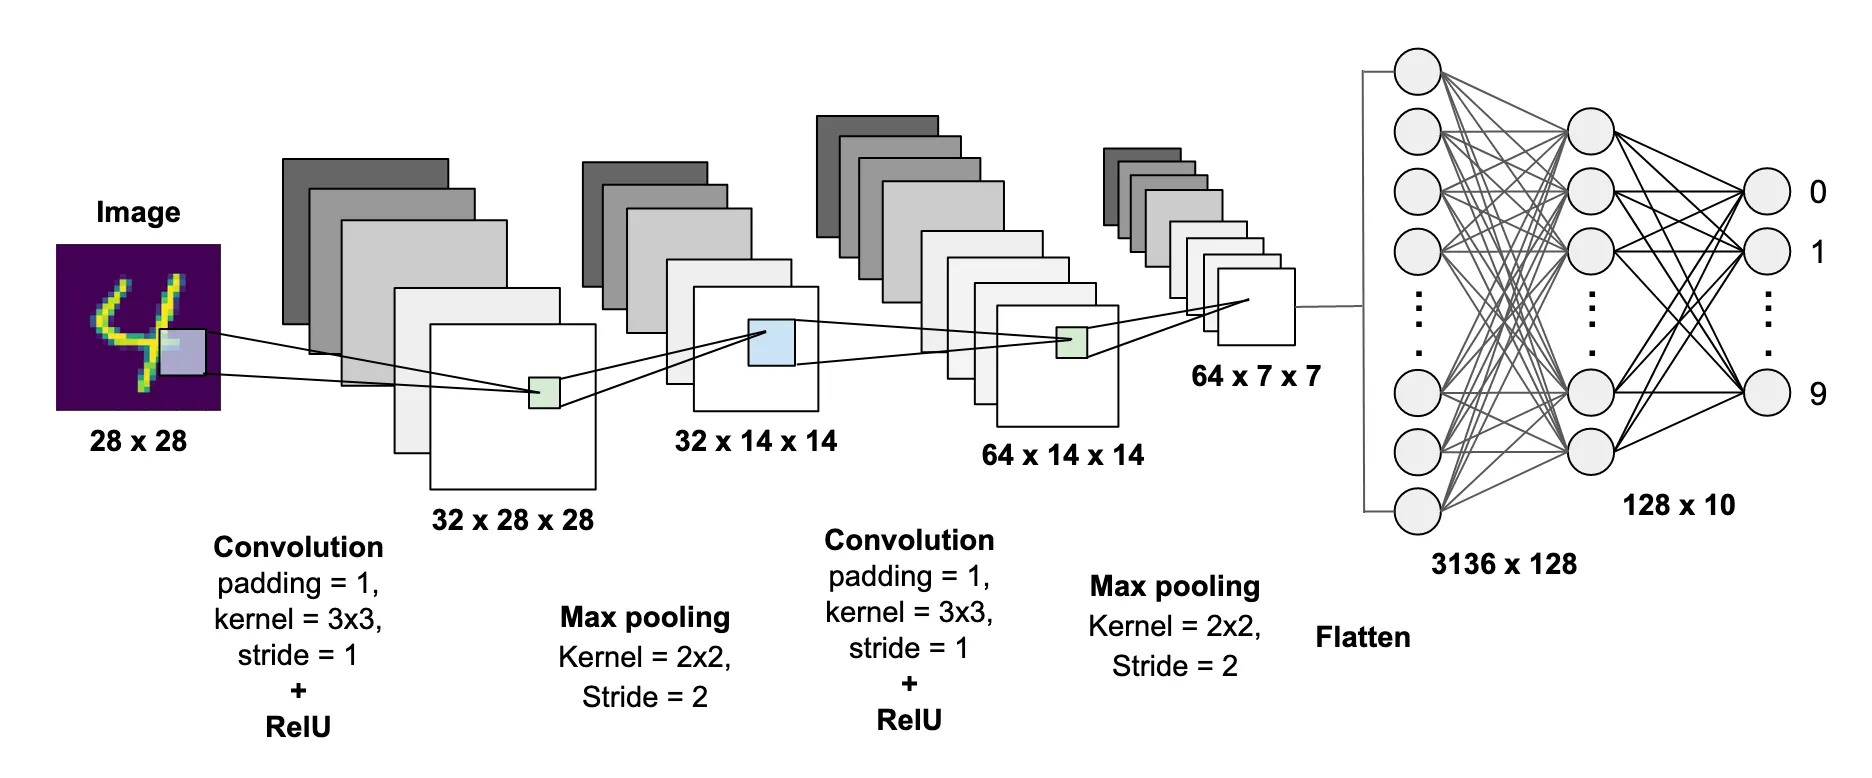

In [ ]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28, 1)))

# Warstwa splotowa z 16 filtrami o wymiarze 3x3
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='valid', activation='relu'))

# Warstwa Max-pooling z filtrem 2x2 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Zmienia kształt tensora wyjściowego z poprzedniej warstwy zamieniając go w wektor
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

## Konfigurowanie i trening modelu


In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'] )
model.fit( x_train, y_train, batch_size=64, epochs=10, validation_split=0.1)

history = model.history.history

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].plot(history['loss'], '-r', label="Training")
ax[0].plot(history['val_loss'], '-b', label="Validation")
ax[0].set_xlabel('Epoch #')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(history['accuracy'], '-r', label="Training")
ax[1].plot(history['val_accuracy'], '-b', label="Validation")
ax[1].set_xlabel('Epoch #')
ax[1].set_ylabel('Accuracy')
plt.show()

## Poprawność klasyfikacji na zbiorze testowym

In [ ]:
score = model.evaluate(x_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

## Predykcja 

In [ ]:
test_prediction = model.predict(x_test)
pred_labels = np.argmax(test_prediction, axis=-1)
true_labels = np.argmax(y_test, axis=-1)

misclassification = (pred_labels != true_labels).nonzero()[0]

plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow((x_test[misclassification[i], :] + x_mean).reshape((28, 28)), cmap=plt.cm.gray)
    plt.title(f'pred = {pred_labels[misclassification[i]]}\ntrue = {true_labels[misclassification[i]]}')
    plt.xticks([]); plt.yticks([])
plt.show()

## Predykcja - prawdopodobieństwo wyjść

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].bar(range(10), test_prediction[misclassification[i]])
axs[1].imshow((x_test[misclassification[i], :] + x_mean).reshape((28, 28)), cmap=plt.cm.gray);

## Macierz pomyłek

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_labels, pred_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Ćwiczenie

Zbuduj model CNN, który w 10 epokach osiągnie lepszy wynik poprawności na danych MNIST niż 99% 
* zwiększ liczbę bloków splotowych  
* dodaj regularyzację L2 (``weight_decay``) aby zapobiec przeuczeniu
* dowolne inne zmiany

In [ ]:
tf.keras.backend.clear_session()





## Informacje o warstwach modelu

``model.layers`` jest listą zawierającą kolejne warstwy 

In [ ]:
layer_id = 0

print(model.layers[layer_id].name)
W = model.layers[layer_id].get_weights()[0]

print(W.shape)
l = model.layers[0]

## Wizualizacja wag (filtrów) pierwszej warstwy splotowej

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(W[:, :, 0, i], cmap=plt.cm.gray)
    plt.xticks([]); plt.yticks([])
    plt.colorbar()
plt.show()

## Wizualizacja map cech

Zobaczmy aktywację map cech przy prezentacji pojedynczego wzorca
* wybieramy przykładowy wzorzec
* wykonujemy predykcję wzorca (powoduje aktywację neuronów)
* prezentujemy uzyskany wynik, domyślnie wynikiem jest pobudzenie warstwy wyjściowej (wektor 10 wartości)


In [ ]:
# idx = 31727 # or any other digit
idx = 0
x = x_train[idx].reshape(1, 28, 28, 1)
output = model.predict([x])

true_label = labels_train[idx]
predicted_label = output[0].argmax()
print('Predicted digit:', predicted_label, '; True digit:', true_label)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].bar(range(10), output[0])
axs[0].set_xlabel('Digit') 
axs[0].set_ylabel('Probability')
axs[1].imshow((x_test[misclassification[i], :] + x_mean).reshape((28, 28)), cmap=plt.cm.gray);

## Odczytywanie aktywacji warstwy splotowej

Wykorzystajmy nasz model do stworzenia sieci, której wyjściem będzie warstwa związana z mapą cech (wyjście warstwy splotowej) 

In [ ]:
print(model.layers[0].output)

In [ ]:
inputs = model.inputs
outputs = model.layers[0].output

model_conv = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model_conv.summary()

In [ ]:
feature_maps = model_conv.predict([x])

print('Feature map shape: ', feature_maps.shape)

plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap=plt.cm.gray)
    plt.xticks([]); plt.yticks([])
    plt.colorbar()
plt.show()

## Aktywacja warstwy max pool

In [ ]:
inputs = model.inputs
outputs = model.layers[1].output

model_pool = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model_pool.summary()

In [ ]:
pooling_maps = model_pool.predict([x])
print(pooling_maps.shape)

plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(pooling_maps[0, :, :, i], cmap=plt.cm.gray)
    plt.xticks([]); plt.yticks([])
    plt.colorbar()
plt.show()

### Ćwiczenie 

Przedstaw wizualizację aktywacji mapy cech drugiej warstwy splotowej dla wybranego wzorca

## Zadanie - LeNet5 na MNIST

Zbuduj architekturę LeNet5 zgodnie z poniższą specyfikacją. Wytrenuj model klasyfikacji na danych MNIST. Postaraj się dobrać algorytm uczenia aby w 10 epokach uzyskać jak najwyższy poziom poprawności.  Oceń poprawność klasyfikacji uzyskanego modelu na zbiorze testowym. Przedstaw w formie graficznej wartości wag (filtrów) pierwszej warstwy splotowej C1. 

**Architektura LeNet5**


|     | Layer            | Kernels  | Kernel size   | Stride   | Pad   | Activation    | 
|-----|------------------|----------|---------------|----------|-------|---------------|
| C1  | Convolution      | 6        |  5x5          | 1        | 2  (``same``) | tanh  |
| S2  | Average  Pooling | -        |  2x2          | 2        | -             | -     |
| C3  | Convolution      | 16       |  5x5          | 1        | 0 (``valid``) | tanh  |
| S4  | Average  Pooling | -        |  2x2          | 2        | -             | -     |
| F1  | Fully connected  | 120      |  -            | -        | -             | tanh  |
| F2  | Fully connected  | 84       |  -            | -        | -             | tanh  |
| F3  | Fully connected  | 10       |  -            | -        | -             | softmax  |


Struktura sieci wraz z wynikowymi rozmiarami map cech przedstawia poniższy rysunek.

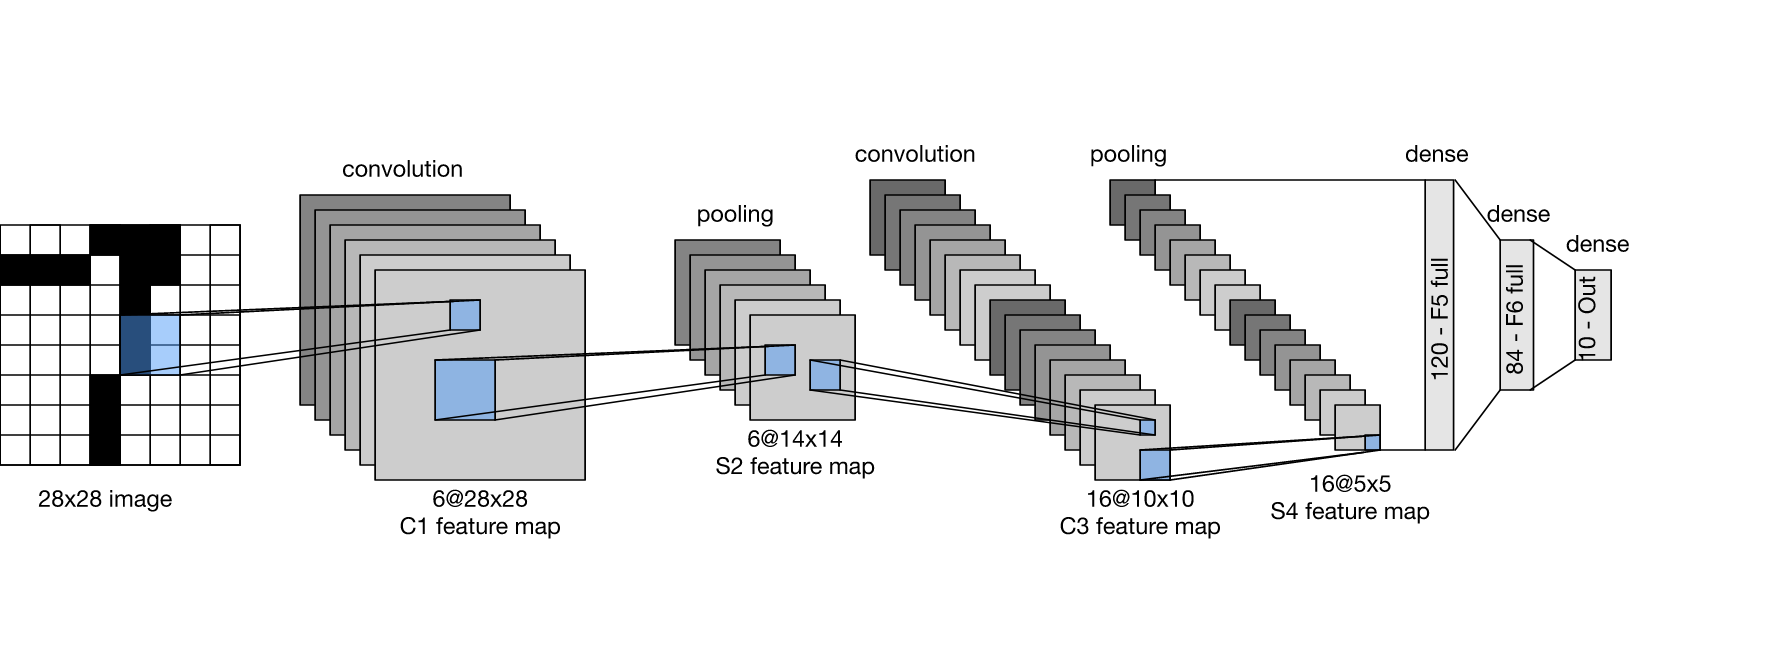

